In [1]:
import numpy as np
import pandas as pd
import re


In [2]:
#read in the csv file
airbnbdf = pd.read_csv('airBnb_LaRochelle2020-3-19.csv', delimiter=',', names=["house_title", "house_type", "price", "user", "no_of_ratings", "rating", "house_detail"])
airbnbdf.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail
96,CHARMANT STUDIO EN CHARENTE-MARITIME,Entire home,€39,Isabelle,(127 reviews),4.91,"['4 guests', '1 bedroom', '2 beds', '1 bath', ..."
14,"Maison à La Rochelle, vieux port et aquarium à...",Entire home,€65,Adeline,(407 reviews),4.48,"['5 guests', '1 bedroom', '3 beds', '1 bath', ..."
64,"Chambre indépendante, entrée privative et parking",Entire home,€32,Nathalie Et José,(152 reviews),4.93,"['2 guests', '1 bedroom', '1 bed', '1 bath', '..."
6,"Studio 26m2 avec vue sur mer, proche centre ville",Entire home,€28,Sami,NaN,NaN,"['2 guests', '1 bedroom', '1 bed', '1 bath']"
180,Chambre bleue,Private room in house,€50,Richard,(101 reviews),4.85,"['2 guests', '1 bedroom', '1 bed', '1 shared b..."


In [3]:
#verify the datatypes
airbnbdf.dtypes

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
dtype: object

In [4]:
airbnbdf.price = airbnbdf.price.astype(str)
airbnbdf.no_of_ratings = airbnbdf.no_of_ratings.astype(str)


In [5]:
def remove_special_chars(val):
    new_val = re.findall('[0-9]',val)
    return "".join(new_val)

In [6]:
#price
airbnbdf.price = airbnbdf.price.apply(remove_special_chars)
print(airbnbdf.price.head(5))


0    35
1    60
2    49
3    40
4    39
Name: price, dtype: object


In [7]:
#number of ratings
airbnbdf.no_of_ratings = airbnbdf.no_of_ratings.apply(remove_special_chars)
print(airbnbdf.no_of_ratings.head(5))

0    301
1     39
2    194
3    114
4    224
Name: no_of_ratings, dtype: object


In [8]:
def split_to_list(str_val):
    return str_val.split(",")

In [9]:
airbnbdf['house_details'] = airbnbdf.house_detail.apply(split_to_list)
airbnbdf.house_details.sample(5)

243    [['12 guests',  '5 bedrooms',  '7 beds',  '1 b...
337    [['12 guests',  '5 bedrooms',  '8 beds',  '4 b...
193    [['4 guests',  '1 bedroom',  '1 bed',  '1 bath...
17     [['2 guests',  '1 bedroom',  '1 bed',  '1 priv...
240    [['4 guests',  '2 bedrooms',  '3 beds',  '1 ba...
Name: house_details, dtype: object

In [10]:
len(airbnbdf)
airbnbdf.house_details[0][0]


"['2 guests'"

In [11]:
airbnbdf = airbnbdf.assign(no_of_guest=airbnbdf.price.mean(), house_size=airbnbdf.price.mean(), no_of_beds = airbnbdf.price.mean(), no_of_baths=airbnbdf.price.mean())


In [12]:
for i in range(len(airbnbdf)):
    try:

        airbnbdf.no_of_guest[i] = airbnbdf.house_details[i][0]
        airbnbdf.house_size[i]  = airbnbdf.house_details[i][1]
        airbnbdf.no_of_beds[i]  = airbnbdf.house_details[i][2]
        airbnbdf.no_of_baths[i]  = airbnbdf.house_details[i][3]
        
    except:
        continue

/home/laclac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/laclac/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/laclac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [13]:
print(airbnbdf.dtypes)
airbnbdf.head(30)

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
house_details     object
no_of_guest       object
house_size        object
no_of_beds        object
no_of_baths       object
dtype: object


,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths
0,Belle chambre d'hôte,Private room in townhouse,35,Evelyne,301,4.97,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",['2 guests','1 bedroom','1 bed','1 shared bath'
1,"Bel appartement coeur de ville, au calme",Entire home,60,Sandra,39,4.95,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...","[['3 guests', '1 bedroom', '2 beds', '1 bat...",['3 guests','1 bedroom','2 beds','1 bath'
2,studio entre le vieux port et le marché,Entire home,49,Jérôme & Malika,194,4.66,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",['2 guests','1 bedroom','1 bed','1 bath'
3,Suite indépendante avec vue sur piscine,Private room in bed and breakfast,40,Bruce,114,4.91,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",['2 guests','1 bedroom','1 bed','1 private bath'
4,Bateau hyper centre La Rochelle (PRINCESS),Entire home,39,Ubblo,224,4.65,"['2 guests', '1 bedroom', '2 beds', 'Half-bath...","[['2 guests', '1 bedroom', '2 beds', 'Half-...",['2 guests','1 bedroom','2 beds','Half-bath'
5,Maisonette proche hyper centre avec parking,Entire home,38,Anne Jessica,60,4.53,"['2 guests', '1 bedroom', '0 beds', '1 bath', ...","[['2 guests', '1 bedroom', '0 beds', '1 bat...",['2 guests','1 bedroom','0 beds','1 bath'
6,"Studio 26m2 avec vue sur mer, proche centre ville",Entire home,28,Sami,,NaN,"['2 guests', '1 bedroom', '1 bed', '1 bath']","[['2 guests', '1 bedroom', '1 bed', '1 bath']]",['2 guests','1 bedroom','1 bed','1 bath']
7,Chambre dans quartier tranquille,Private room in townhouse,27,Stéphanie,45,4.93,"['1 guest', '1 bedroom', '1 bed', '1 shared ba...","[['1 guest', '1 bedroom', '1 bed', '1 share...",['1 guest','1 bedroom','1 bed','1 shared bath'
8,Chambre la Rochelle (Lagord) avec petit déjeuner.,Private room in house,45,Evelyne,136,4.94,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",['2 guests','1 bedroom','1 bed','1 private bath'
9,Beau 2 pièces avec terrasse et garage + vélos,Entire home,60,Sandra,164,4.90,"['3 guests', '1 bedroom', '2 beds', '1.5 baths...","[['3 guests', '1 bedroom', '2 beds', '1.5 b...",['3 guests','1 bedroom','2 beds','1.5 baths'


In [14]:
#number of guests
airbnbdf.no_of_guest = airbnbdf.no_of_guest.apply(remove_special_chars)
print(airbnbdf.no_of_guest.head(5))

0    2
1    3
2    2
3    2
4    2
Name: no_of_guest, dtype: object


In [15]:
print(sum(airbnbdf.house_size.isna()))

print(sum(airbnbdf.house_size.isnull()))

0
0


In [16]:
def convert_chars(val):
   ##studio is tagged as 0.5 bedroom
    if val == " 'Studio'":
        new_val = '0.5'
    else:
        new_val = re.findall('[0-9]',val)
    
    return "".join(new_val)

def remove_chars(val):
    new_val = re.findall('[0-9.]+',val)
    return "".join(new_val)

In [17]:
airbnbdf.house_size = airbnbdf.house_size.astype(str)

airbnbdf = airbnbdf.assign(house=airbnbdf.house_size.apply(convert_chars))

airbnbdf.sample(5)


,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house
230,Un cocon paisible et ensoleillé proche du centre,Private room in townhouse,35,Florence,23,4.64,"['3 guests', '1 bedroom', '2 beds', '1.5 share...","[['3 guests', '1 bedroom', '2 beds', '1.5 s...",3,'1 bedroom','2 beds','1.5 shared baths',1
192,Chambres 2 pers. La Flotte en Ré,Private room in nature lodge,49,Frédéric,211,4.73,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2,'1 bedroom','1 bed','1 shared bath',1
193,T2 40m2 AU CENTRE DE LA ROCHELLE DANS UN JARDIN !,Entire home,50,Carine,62,4.50,"['4 guests', '1 bedroom', '1 bed', '1 bath', '...","[['4 guests', '1 bedroom', '1 bed', '1 bath...",4,'1 bedroom','1 bed','1 bath',1
246,"🏠 , 5 min des plages,10 de ile de Ré",Entire home,85,Magali,,NaN,"['16+ guests', '3 bedrooms', '4 beds', '1 bath...","[['16+ guests', '3 bedrooms', '4 beds', '1 ...",16,'3 bedrooms','4 beds','1 bath',3
116,L'Emilienne,Private room in bed and breakfast,63,Katia,54,4.80,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",2,'1 bedroom','1 bed','1 private bath',1


In [18]:
airbnbdf.no_of_beds = airbnbdf.no_of_beds.astype(str)
airbnbdf.no_of_baths = airbnbdf.no_of_baths.astype(str)

airbnbdf = airbnbdf.assign(beds=airbnbdf.no_of_beds.apply(remove_chars))
airbnbdf = airbnbdf.assign(bath=airbnbdf.no_of_baths.apply(remove_chars))
airbnbdf.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
27,chambre independante,Entire home,32,Josiane,78,4.56,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",2,'1 bedroom','1 bed','1 bath',1,1,1
133,"Chambre d'Hôtes "" Cosy"" Le Noroît",Private room in chalet,33,Catherine,290,4.77,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2,'1 bedroom','1 bed','1 shared bath',1,1,1
105,Tiny house/Chalet en bois à 10 min de La Rochelle,Entire home,60,Alexandre,72,4.74,"['4 guests', '1 bedroom', '3 beds', '1 bath', ...","[['4 guests', '1 bedroom', '3 beds', '1 bat...",4,'1 bedroom','3 beds','1 bath',1,3,1
47,Appartement calme au bord de l'océan,Entire home,90,Béa,7,4.71,"['6 guests', '2 bedrooms', '2 beds', '1 bath',...","[['6 guests', '2 bedrooms', '2 beds', '1 ba...",6,'2 bedrooms','2 beds','1 bath',2,2,1
163,2-Grand logement proche centre ville,Entire home,80,Kévin,59,4.69,"['4 guests', '2 bedrooms', '3 beds', '2 baths'...","[['4 guests', '2 bedrooms', '3 beds', '2 ba...",4,'2 bedrooms','3 beds','2 baths',2,3,2


In [19]:
airbnbdf.dtypes

house_title       object
house_type        object
price             object
user              object
no_of_ratings     object
rating           float64
house_detail      object
house_details     object
no_of_guest       object
house_size        object
no_of_beds        object
no_of_baths       object
house             object
beds              object
bath              object
dtype: object

In [20]:
#checking data
(airbnbdf == "none").any()

/home/laclac/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


house_title      False
house_type       False
price            False
user             False
no_of_ratings    False
rating           False
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [21]:
(airbnbdf.isnull()).any()

house_title      False
house_type        True
price            False
user             False
no_of_ratings    False
rating            True
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [22]:
(airbnbdf.isna()).any()

house_title      False
house_type        True
price            False
user             False
no_of_ratings    False
rating            True
house_detail     False
house_details    False
no_of_guest      False
house_size       False
no_of_beds       False
no_of_baths      False
house            False
beds             False
bath             False
dtype: bool

In [23]:
print(len(airbnbdf))
airbnbdf.isna().sum().sum() #check num of Nans

338


77

In [24]:
airbnbdf.dropna()

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
0,Belle chambre d'hôte,Private room in townhouse,35,Evelyne,301,4.97,"['2 guests', '1 bedroom', '1 bed', '1 shared b...","[['2 guests', '1 bedroom', '1 bed', '1 shar...",2,'1 bedroom','1 bed','1 shared bath',1,1,1
1,"Bel appartement coeur de ville, au calme",Entire home,60,Sandra,39,4.95,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...","[['3 guests', '1 bedroom', '2 beds', '1 bat...",3,'1 bedroom','2 beds','1 bath',1,2,1
2,studio entre le vieux port et le marché,Entire home,49,Jérôme & Malika,194,4.66,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",2,'1 bedroom','1 bed','1 bath',1,1,1
3,Suite indépendante avec vue sur piscine,Private room in bed and breakfast,40,Bruce,114,4.91,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",2,'1 bedroom','1 bed','1 private bath',1,1,1
4,Bateau hyper centre La Rochelle (PRINCESS),Entire home,39,Ubblo,224,4.65,"['2 guests', '1 bedroom', '2 beds', 'Half-bath...","[['2 guests', '1 bedroom', '2 beds', 'Half-...",2,'1 bedroom','2 beds','Half-bath',1,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Chambre à 15-20 min de La Rochelle,Private room in house,30,Victoria,68,4.63,"['2 guests', '1 bedroom', '1 bed', '1.5 shared...","[['2 guests', '1 bedroom', '1 bed', '1.5 sh...",2,'1 bedroom','1 bed','1.5 shared baths',1,1,1.5
328,Des vacances responsables et apaisantes,Entire home,110,Anthony,43,4.84,"['6 guests', '3 bedrooms', '2 beds', '1 bath',...","[['6 guests', '3 bedrooms', '2 beds', '1 ba...",6,'3 bedrooms','2 beds','1 bath',3,2,1
329,Chambre d'hôtel lit double,Room in boutique hotel,90,Ralitsa,7,4.00,"['2 guests', '1 bedroom', '1 bed', '1 private ...","[['2 guests', '1 bedroom', '1 bed', '1 priv...",2,'1 bedroom','1 bed','1 private bath',1,1,1
331,L'Authentique de 1841,Private room in bed and breakfast,50,Lydie,8,5.00,"['3 guests', '1 bedroom', '2 beds', '1 private...","[['3 guests', '1 bedroom', '2 beds', '1 pri...",3,'1 bedroom','2 beds','1 private bath',1,2,1


In [25]:
airbnbdfClean = airbnbdf.dropna() #drop all NaN's

In [26]:
# cross verify

print(len(airbnbdfClean))
airbnbdfClean.isna().sum().sum() #check num of Nans

262


0

In [27]:
#clean rows with empty price
airbnbdfClean.loc[airbnbdfClean.price == ''] 

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
129,Nuit(s) à quai à bord d'une Vedette Haut Standing,Entire home,,Maxence,43,4.62,"['6 guests', '2 bedrooms', '3 beds', '1 bath',...","[['6 guests', '2 bedrooms', '3 beds', '1 ba...",6,'2 bedrooms','3 beds','1 bath',2,3,1
265,Laissez vous bercer par les flots #Plage à 100m..,Entire home,,Florent,3,5.00,"['4 guests', '2 bedrooms', '2 beds', '1.5 bath...","[['4 guests', '2 bedrooms', '2 beds', '1.5 ...",4,'2 bedrooms','2 beds','1.5 baths',2,2,1.5
285,Laissez vous bercer par les flots #Plage à 100m..,Entire home,,Florent,3,5.00,"['4 guests', '2 bedrooms', '2 beds', '1.5 bath...","[['4 guests', '2 bedrooms', '2 beds', '1.5 ...",4,'2 bedrooms','2 beds','1.5 baths',2,2,1.5
305,Laissez vous bercer par les flots #Plage à 100m..,Entire home,,Florent,3,5.00,"['4 guests', '2 bedrooms', '2 beds', '1.5 bath...","[['4 guests', '2 bedrooms', '2 beds', '1.5 ...",4,'2 bedrooms','2 beds','1.5 baths',2,2,1.5


In [28]:
print(airbnbdfClean.shape) # check  shape before dropping 4 rows
airbnbdfClean = airbnbdfClean.drop([129,265,285,305], axis=0)
airbnbdfClean.shape # check  shape after dropping 4 rows

(262, 15)


(258, 15)

In [29]:
#convert price to float
airbnbdfClean.price=airbnbdfClean.price.astype(float)


In [30]:
#convert no_of_ratings to int
airbnbdfClean.no_of_ratings=airbnbdfClean.no_of_ratings.astype(int)


In [31]:
#convert no_of_guest to float
airbnbdfClean.no_of_guest=airbnbdfClean.no_of_guest.astype(float)

In [32]:
#convert house details to float
airbnbdfClean.house=airbnbdfClean.house.astype(float)

In [33]:
#clean rows with empty house details (fix issue with beds)
airbnbdfClean.loc[airbnbdfClean.beds == ''] 

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
125,Chambres 3 pers. La Flotte en Ré,Private room in nature lodge,52.0,Frédéric,199,4.75,"['\U000f0004', '\U000f0019']","[['\U000f0004', '\U000f0019']]",4.0,'\U000f0019'],inf,inf,19.0,,
127,Appartement HYPERCENTRE Vieux Port,Entire home,150.0,Floriane,114,4.73,"['\U000f0004', '\U000f0019']","[['\U000f0004', '\U000f0019']]",4.0,'\U000f0019'],inf,inf,19.0,,
132,CHAMBRES A DEUX PAS DU CENTRE ET PLAGE,Private room in townhouse,52.0,Cecile Et Jean,76,4.68,"['\U000f0004', '\U000f0019']","[['\U000f0004', '\U000f0019']]",4.0,'\U000f0019'],inf,inf,19.0,,


In [34]:
print(airbnbdfClean.shape) # check  shape before dropping 3 rows
airbnbdfClean = airbnbdfClean.drop([125,127,132], axis=0)
airbnbdfClean.shape # check  shape after dropping 3 rows

(258, 15)


(255, 15)

In [35]:
#convert beds to float
airbnbdfClean.beds=airbnbdfClean.beds.astype(float)

In [36]:
#fix issue with bath: find all blank cells and see why 
airbnbdfClean.loc[airbnbdfClean.bath == '']

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
4,Bateau hyper centre La Rochelle (PRINCESS),Entire home,39.0,Ubblo,224,4.65,"['2 guests', '1 bedroom', '2 beds', 'Half-bath...","[['2 guests', '1 bedroom', '2 beds', 'Half-...",2.0,'1 bedroom','2 beds','Half-bath',1.0,2.0,
34,Bateau hyper centre La Rochelle (RIPTIDE),Entire home,39.0,Ubblo,163,4.42,"['2 guests', '1 bedroom', '1 bed', 'Half-bath'...","[['2 guests', '1 bedroom', '1 bed', 'Half-b...",2.0,'1 bedroom','1 bed','Half-bath',1.0,1.0,
59,Bateau hyper centre La Rochelle (OCEANIS),Entire home,89.0,Ubblo,91,4.52,"['4 guests', '2 bedrooms', '2 beds', 'Half-bat...","[['4 guests', '2 bedrooms', '2 beds', 'Half...",4.0,'2 bedrooms','2 beds','Half-bath',2.0,2.0,
60,bateau hyper centre (PTIT CHIPO),Entire home,89.0,Ubblo,16,4.69,"['2 guests', '1 bedroom', '1 bed', 'Half-bath'...","[['2 guests', '1 bedroom', '1 bed', 'Half-b...",2.0,'1 bedroom','1 bed','Half-bath',1.0,1.0,
77,BIENVENUE À BORD,Entire home,70.0,Marie-Noëlle,180,4.81,"['5 guests', '2 bedrooms', '2 beds', 'Half-bat...","[['5 guests', '2 bedrooms', '2 beds', 'Half...",5.0,'2 bedrooms','2 beds','Half-bath',2.0,2.0,
84,"Joli Voilier de 10m, caractère et esprit du large",Entire home,80.0,Henri-Noël,153,4.84,"['5 guests', '2 bedrooms', '5 beds', 'Half-bat...","[['5 guests', '2 bedrooms', '5 beds', 'Half...",5.0,'2 bedrooms','5 beds','Half-bath',2.0,5.0,
93,BIENVENUE À BORD 3,Entire home,75.0,Marie-Noëlle,33,4.88,"['4 guests', '2 bedrooms', '2 beds', 'Half-bat...","[['4 guests', '2 bedrooms', '2 beds', 'Half...",4.0,'2 bedrooms','2 beds','Half-bath',2.0,2.0,
107,"Voilier au vieux port ,vue tours",Entire home,55.0,Naiwen,62,4.19,"['4 guests', '1 bedroom', '3 beds', 'Half-bat...","[['4 guests', '1 bedroom', '3 beds', 'Half...",4.0,'1 bedroom','3 beds','Half-bath',1.0,3.0,
159,Chbre 2 lits 90 avec piscine proche La Rochelle,Private room in house,42.0,Bernadette,12,4.92,"['2 guests', '1 bedroom', '1 bed', 'Private ha...","[['2 guests', '1 bedroom', '1 bed', 'Privat...",2.0,'1 bedroom','1 bed','Private half-bath',1.0,1.0,
206,"Chambre lit 160, avec piscine proche La Rochelle",Private room in house,42.0,Bernadette,19,4.89,"['2 guests', '1 bedroom', '1 bed', 'Private ha...","[['2 guests', '1 bedroom', '1 bed', 'Privat...",2.0,'1 bedroom','1 bed','Private half-bath',1.0,1.0,


In [37]:
#set "half-bath" as 0.5
airbnbdfClean.loc[airbnbdfClean.bath == ''] = airbnbdfClean.loc[airbnbdfClean.bath == ''].replace('', 0.5)

In [38]:
#convert bath to float
airbnbdfClean.bath=airbnbdfClean.bath.astype(float)

In [39]:
airbnbdfClean.dtypes

house_title       object
house_type        object
price            float64
user              object
no_of_ratings      int64
rating           float64
house_detail      object
house_details     object
no_of_guest      float64
house_size        object
no_of_beds        object
no_of_baths       object
house            float64
beds             float64
bath             float64
dtype: object

In [40]:
airbnbdfClean.sample(5)

,house_title,house_type,price,user,no_of_ratings,rating,house_detail,house_details,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
144,Maisonnette Ind. Stationnement gratuit facile rue,Entire home,60.0,Al,15,4.80,"['3 guests', '1 bedroom', '2 beds', '1 bath',...","[['3 guests', '1 bedroom', '2 beds', '1 ba...",3.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
238,"Charmant appart. ""Ré"", 2-4 pers., piscine chau...",Entire home,125.0,Laure,25,4.88,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...","[['4 guests', '1 bedroom', '2 beds', '1 bat...",4.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
22,APPARTEMENT *** TERRASSE - CENTRE HISTORIQUE,Entire home,59.0,Xavier,26,4.69,"['2 guests', '1 bedroom', '1 bed', '1 bath', '...","[['2 guests', '1 bedroom', '1 bed', '1 bath...",2.0,'1 bedroom','1 bed','1 bath',1.0,1.0,1.0
29,type gite dans un site naturel,Entire home,60.0,Carole,226,4.79,"['4 guests', '1 bedroom', '2 beds', '1 bath', ...","[['4 guests', '1 bedroom', '2 beds', '1 bat...",4.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
196,La campagne en centre ville,Entire home,40.0,Jeremie,92,4.71,"['5 guests', '2 bedrooms', '3 beds', '1 bath',...","[['5 guests', '2 bedrooms', '3 beds', '1 ba...",5.0,'2 bedrooms','3 beds','1 bath',2.0,3.0,1.0


In [41]:
airbnbdfClean.corr()

,price,no_of_ratings,rating,no_of_guest,house,beds,bath
price,1.000000,-0.133275,0.031429,0.617995,0.610560,0.546063,-0.053438
no_of_ratings,-0.133275,1.000000,-0.076365,-0.030498,-0.055283,-0.031716,-0.023666
rating,0.031429,-0.076365,1.000000,-0.057941,-0.038060,-0.060434,-0.105515
no_of_guest,0.617995,-0.030498,-0.057941,1.000000,0.865595,0.863328,-0.038283
house,0.610560,-0.055283,-0.038060,0.865595,1.000000,0.797407,-0.022130
beds,0.546063,-0.031716,-0.060434,0.863328,0.797407,1.000000,-0.045409
bath,-0.053438,-0.023666,-0.105515,-0.038283,-0.022130,-0.045409,1.000000


(7.0, 0.0)

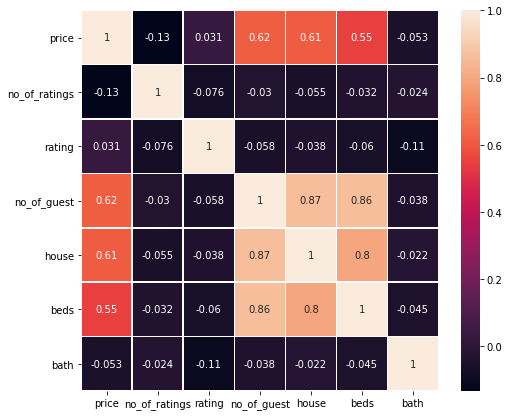

In [45]:
#Correlation Matrix visualization

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,7)) 
corrMatrix = airbnbdfClean.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# write the cleaned data to csv for data analysis

airbnbdfClean.to_csv('airbnbdfClean.csv')